https://analyticsindiamag.com/a-complete-guide-to-lstm-architecture-and-its-use-in-text-classification/

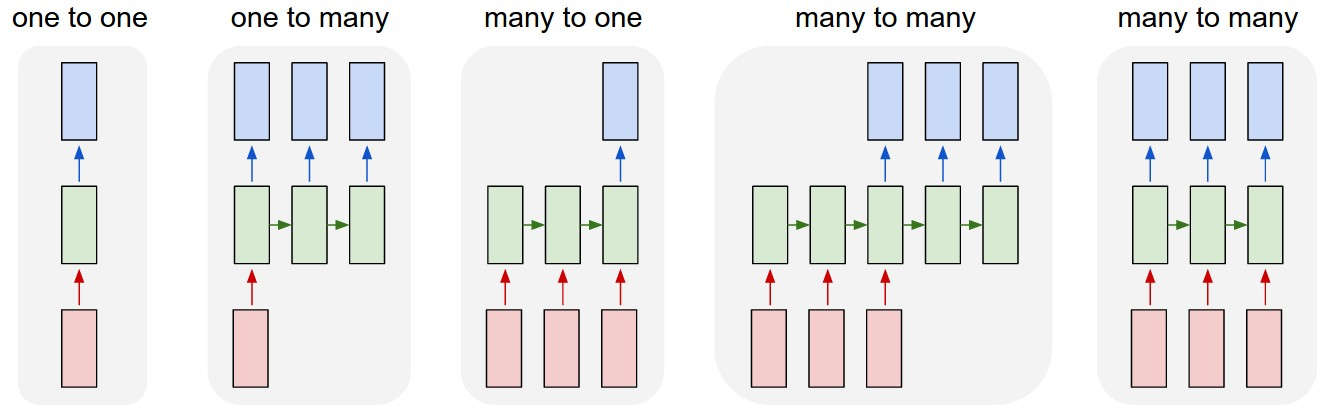

Vanilla mode of processing without RNN, from fixed-sized input to fixed-sized output (e.g. image classification).

Sequence output (e.g. image captioning takes an image and outputs a sentence of words).

Sequence input (e.g. sentiment analysis where a given sentence is classified as expressing positive or negative sentiment)

Sequence input and sequence output (e.g. Machine Translation: an RNN reads a sentence in English and then outputs a sentence in French).

Synced sequence input and output (e.g. video classification where we wish to label each frame of the video).

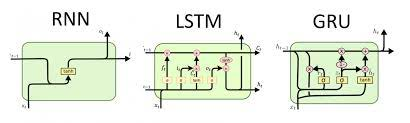

In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=6000)


17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# truncate and pad input sequences
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


In [ ]:
#model
model = Sequential()
model.add(Embedding(6000, 32, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           192000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, epochs=3, batch_size=64)


Epoch 1/3
391/391 [==============================] - 236s 594ms/step - loss: 0.4959 - accuracy: 0.7644
Epoch 2/3
391/391 [==============================] - 228s 584ms/step - loss: 0.2908 - accuracy: 0.8837
Epoch 3/3
391/391 [==============================] - 228s 583ms/step - loss: 0.2354 - accuracy: 0.9106


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.10%
